In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [151]:
df= pd.read_csv("/content/laptop_prices.csv")

In [152]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [156]:
#Identify 'No OS' values
mode_os = df['OS'].replace('No OS', pd.NA).mode()[0]


In [157]:
#Replace 'No OS' with the mode
df['OS'] = df['OS'].replace('No OS', mode_os)


In [158]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,Windows 10,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [159]:
df.shape

(1275, 23)

In [10]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [12]:
df.isnull().mean()*100

,0
Company,0.0
Product,0.0
TypeName,0.0
Inches,0.0
Ram,0.0
OS,0.0
Weight,0.0
Price_euros,0.0
Screen,0.0
ScreenW,0.0


In [15]:
df.columns.value_counts()

,count
Company,1
IPSpanel,1
GPU_company,1
SecondaryStorageType,1
PrimaryStorageType,1
SecondaryStorage,1
PrimaryStorage,1
CPU_model,1
CPU_freq,1
CPU_company,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

<Axes: xlabel='Company'>

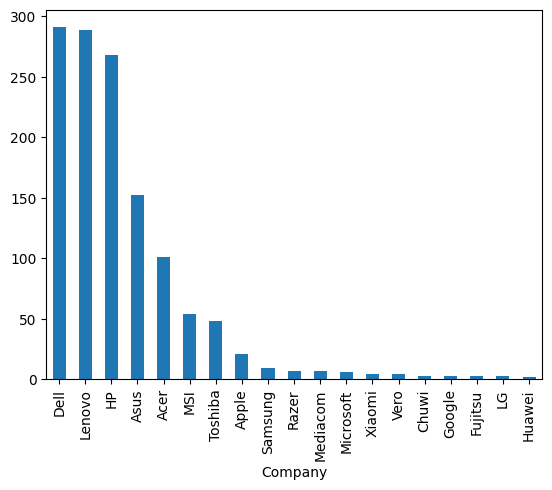

In [25]:
df['Company'].value_counts().plot(kind= "bar")



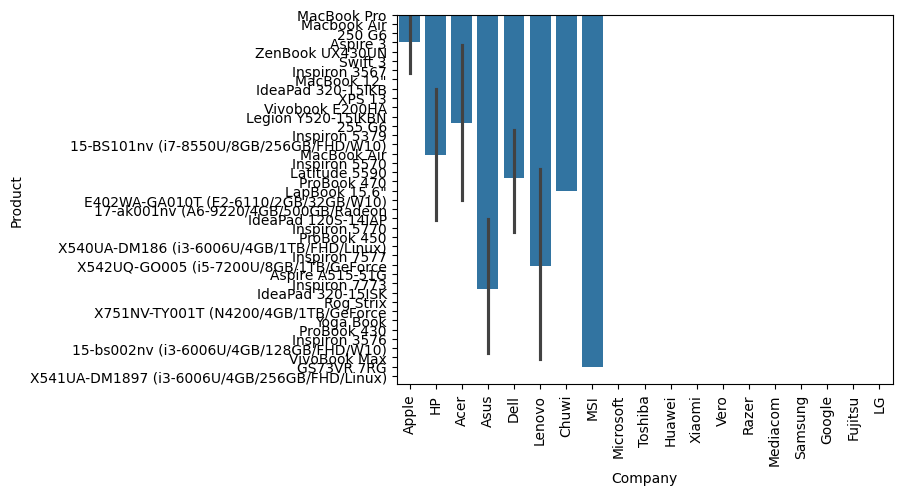

In [60]:
#what products are using from which company
sns.barplot(x = df['Company'],y=df['Product'].head(70))
plt.xticks(rotation='vertical')
plt.show()

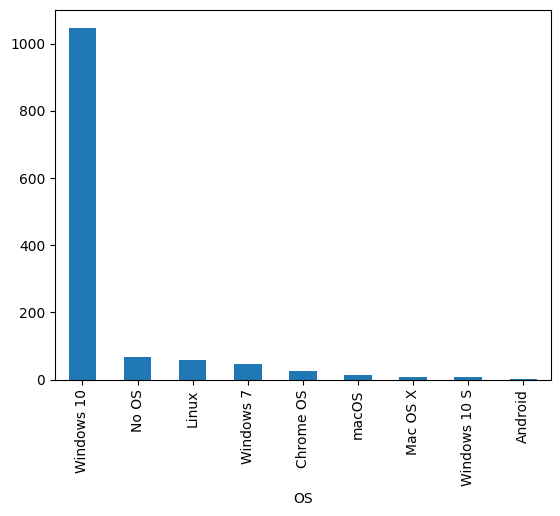

In [40]:
#which OS is widely using
df['OS'].value_counts().plot(kind ='bar')
plt.xticks(rotation='vertical')
plt.show()

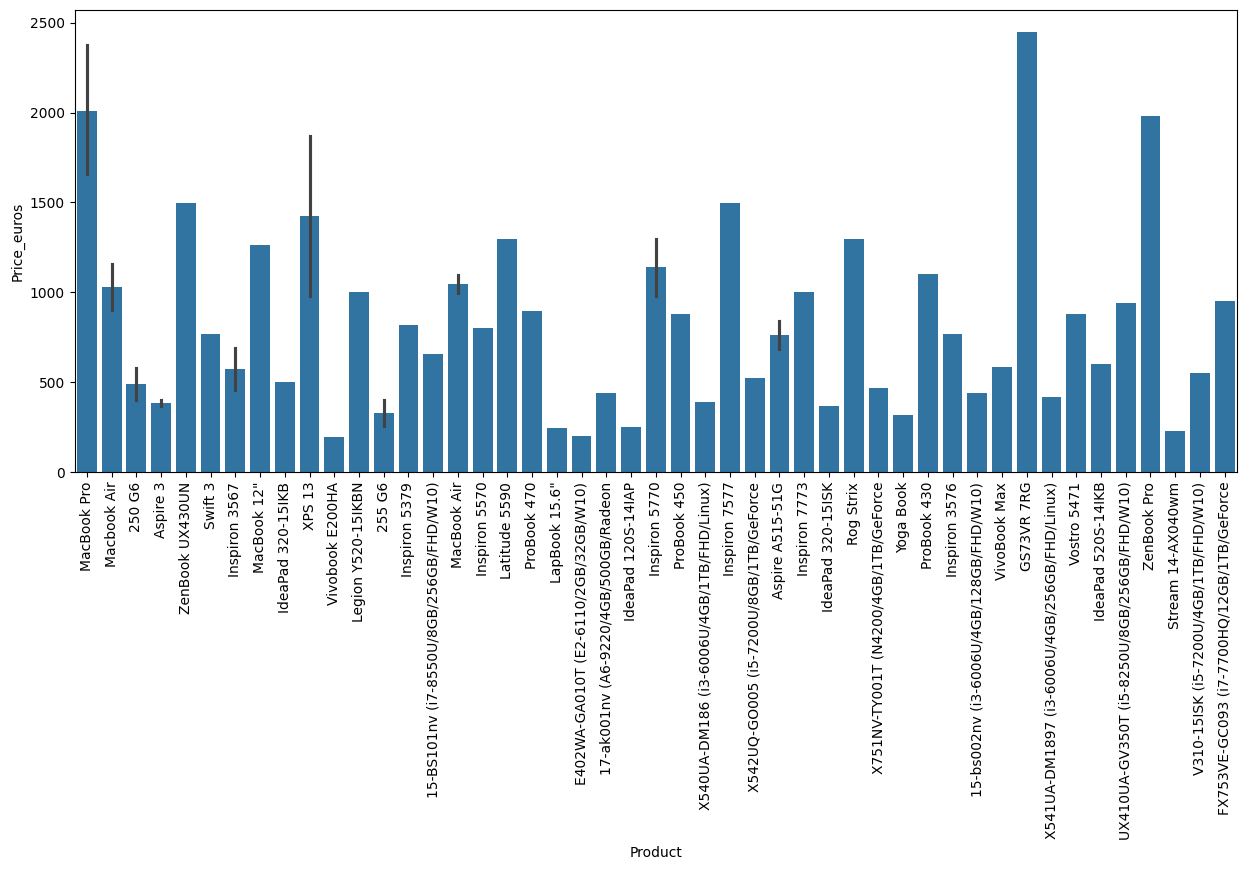

In [52]:
#Price of product for 70 prodcuts
plt.figure(figsize=(15,6))
sns.barplot(x = df['Product'].head(70),y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

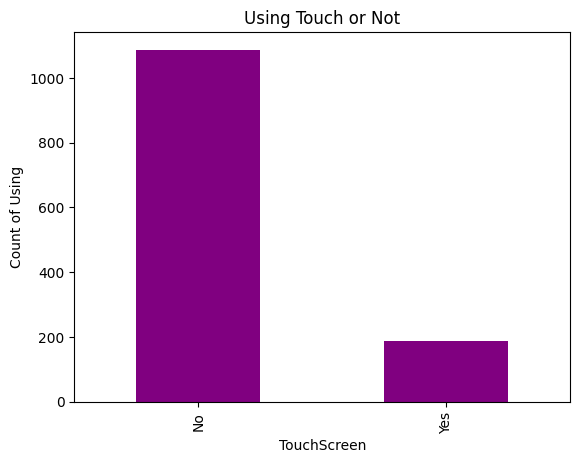

In [63]:
#How many are using Touchscreen and NoTouchscreen
df['Touchscreen'].value_counts().plot(kind = 'bar',color='purple')
plt.title("Using Touch or Not")
plt.xlabel("TouchScreen")
plt.ylabel("Count of Using")
plt.show()

<Axes: xlabel='TypeName'>

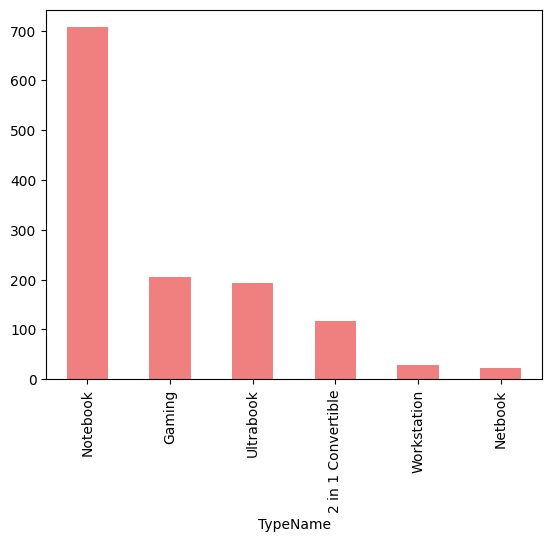

In [66]:
#Type_Name
df['TypeName'].value_counts().plot(kind = 'bar',color='lightcoral')

Text(0.5, 1.0, 'Type_name vs Price')

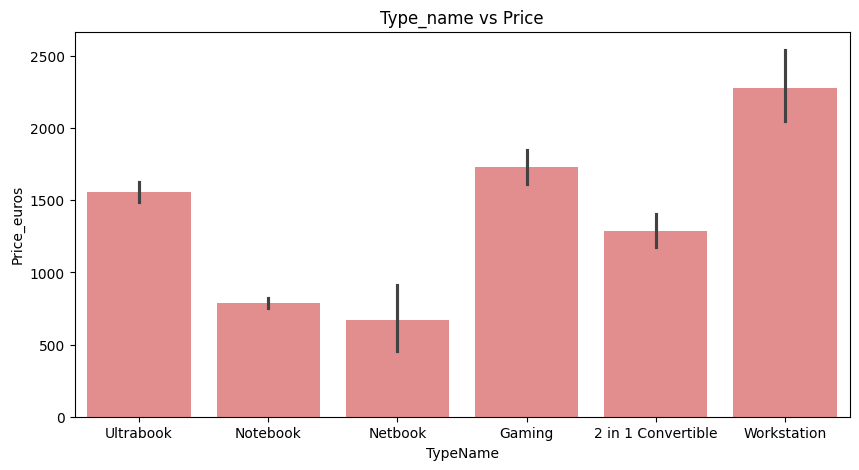

In [70]:
#Type_name and price
plt.figure(figsize=(10,5))
sns.barplot(x = df ['TypeName'], y= df['Price_euros'],color='lightcoral')
plt.title("Type_name vs Price")


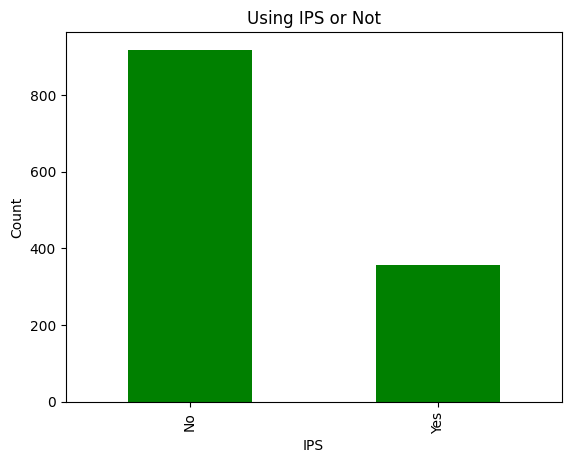

In [107]:
#How many using IPS
df['IPSpanel'].value_counts().plot(kind = 'bar',color='green')
plt.title("Using IPS or Not")
plt.xlabel("IPS")
plt.ylabel("Count")
plt.show()

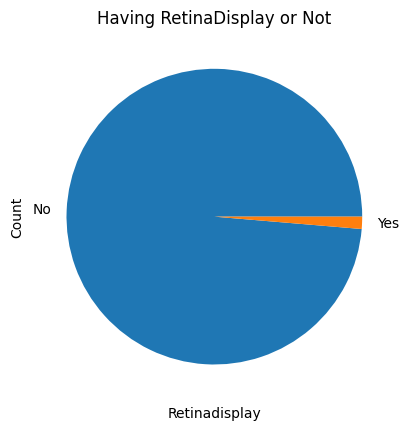

In [109]:
#How many having Retina_Display
df['RetinaDisplay'].value_counts().plot(kind = 'pie',color='green')
plt.title("Having RetinaDisplay or Not")
plt.xlabel("Retinadisplay")
plt.ylabel("Count")
plt.show()

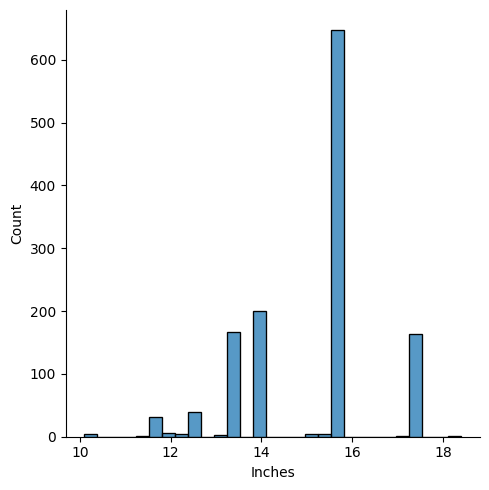

In [75]:
sns.displot(df['Inches'])

Text(0, 0.5, 'Price')

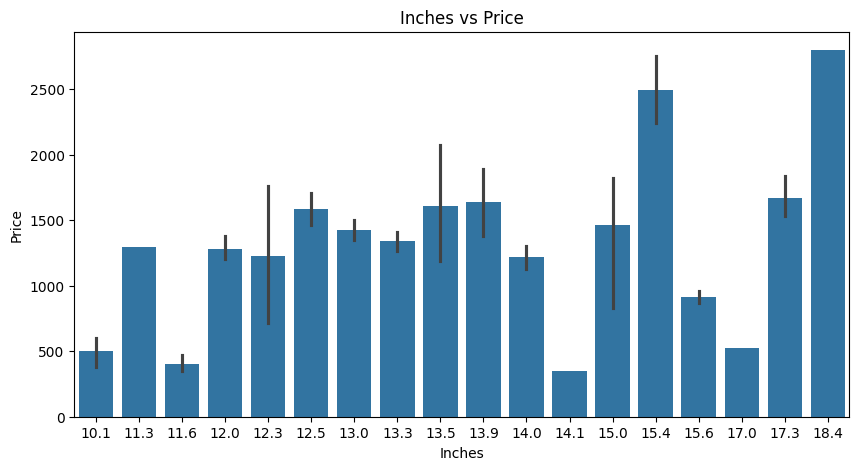

In [76]:
#Inches vs price
plt.figure(figsize= (10,5))
sns.barplot(x = df['Inches'], y = df['Price_euros'])
plt.title("Inches vs Price")
plt.xlabel("Inches")
plt.ylabel("Price")

Text(0.5, 1.0, 'data of Screen')

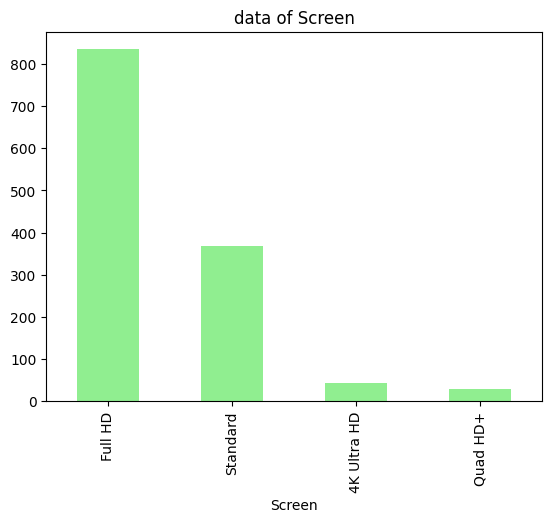

In [79]:
#Screen
df['Screen'].value_counts().plot(kind="bar",color='lightgreen')
plt.title("data of Screen")

Text(0, 0.5, 'Price')

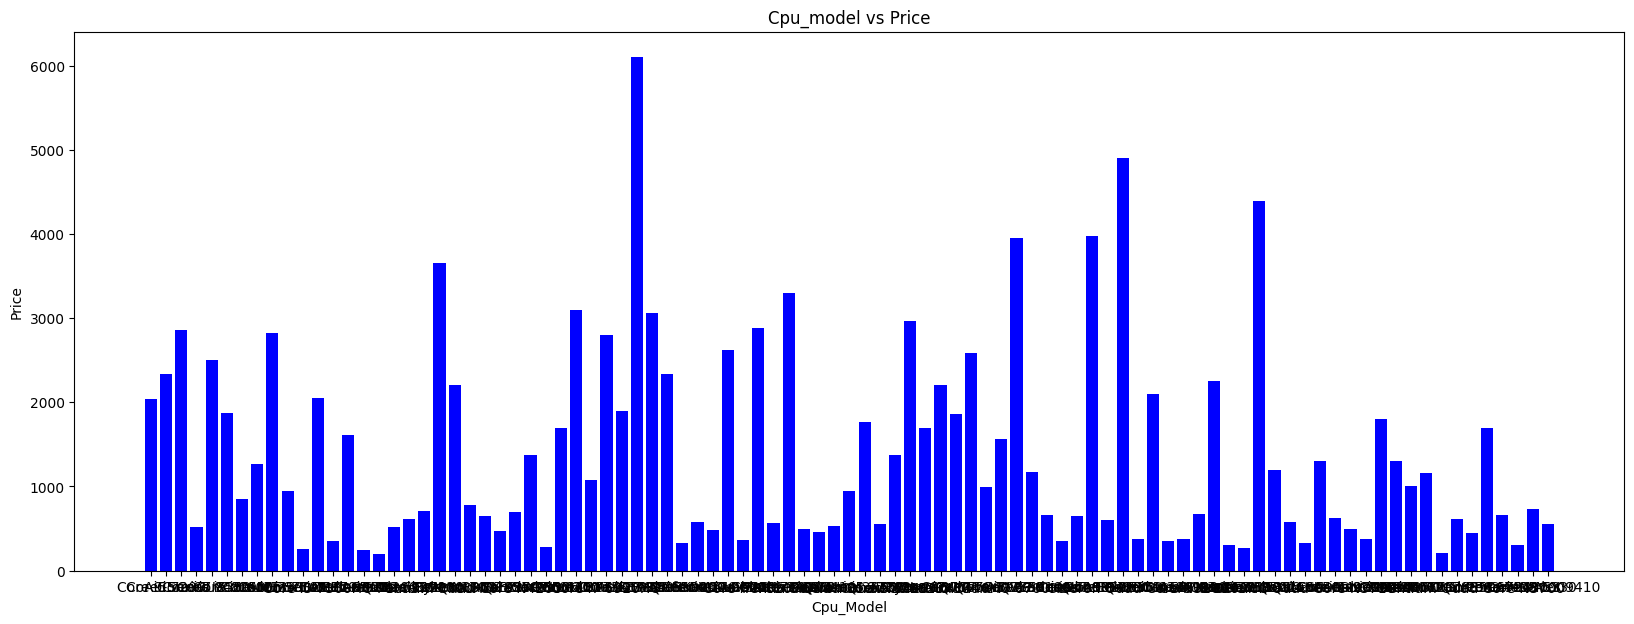

In [84]:
#Cpu_model vs Price
plt.figure(figsize=(20,7))
plt.bar(x= df['CPU_model'], height=df['Price_euros'],color="blue")
plt.title("Cpu_model vs Price")
plt.xlabel("Cpu_Model")
plt.ylabel("Price")

<Axes: xlabel='GPU_company'>

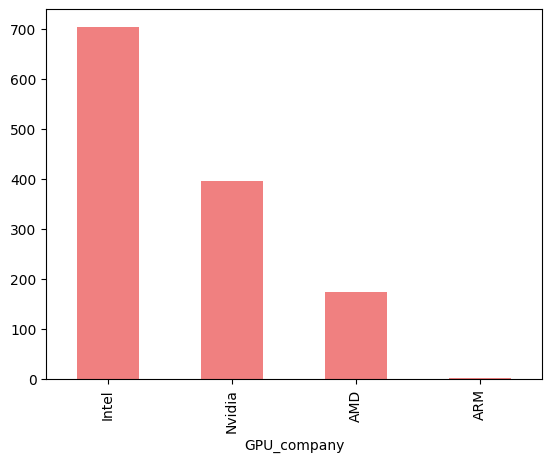

In [93]:
#GPU
df['GPU_company'].value_counts().plot(kind="bar",color="lightcoral")

Text(0, 0.5, 'Price')

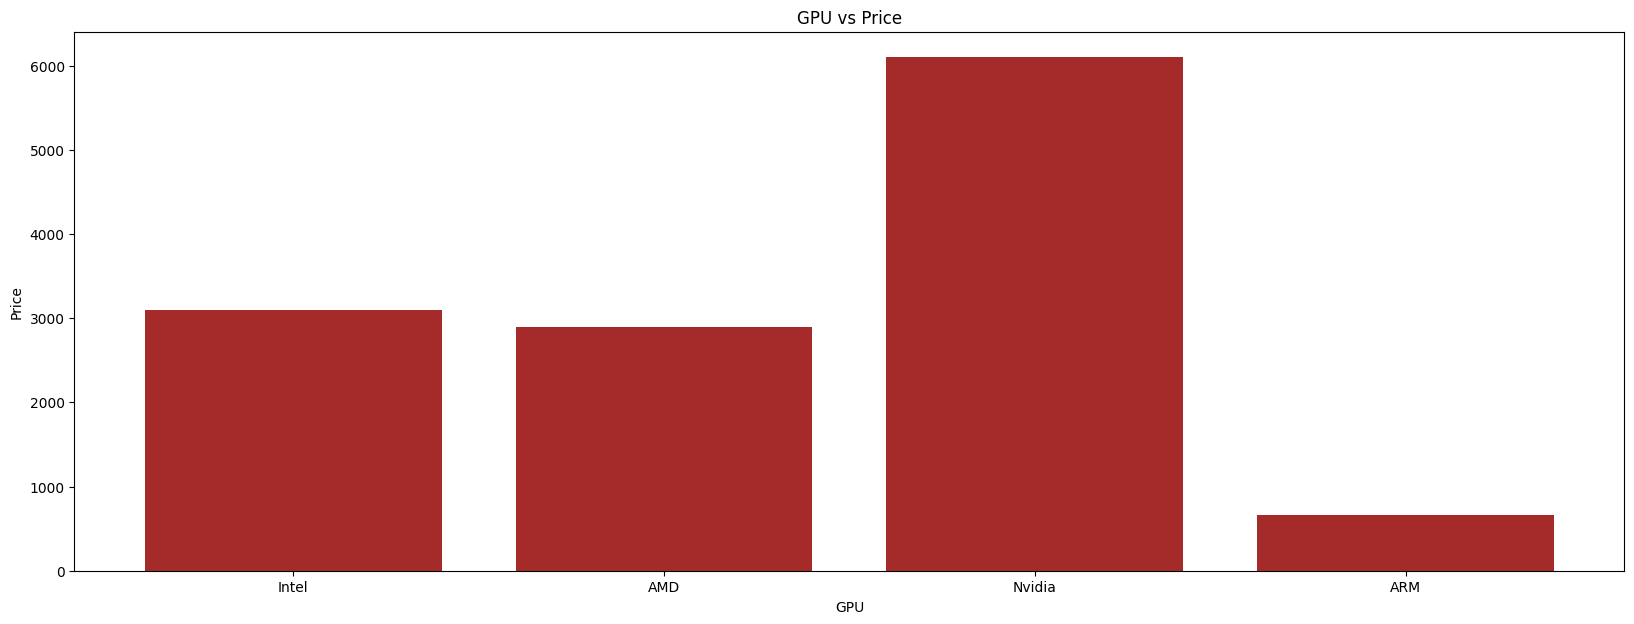

In [87]:
#Gpu vs price
plt.figure(figsize=(20,7))
plt.bar(x= df['GPU_company'], height=df['Price_euros'],color="Brown")
plt.title("GPU vs Price")
plt.xlabel("GPU")
plt.ylabel("Price")

<Axes: xlabel='Ram'>

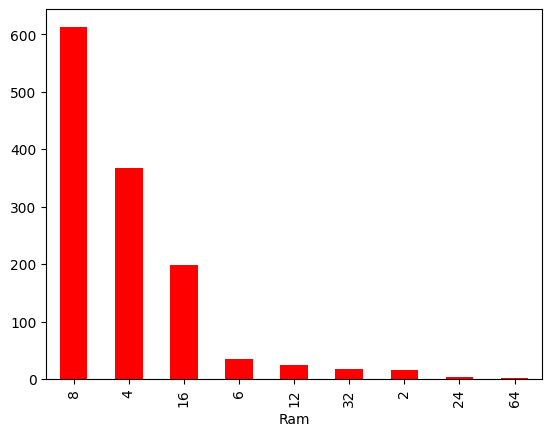

In [100]:
#Ram
df['Ram'].value_counts().plot(kind='bar',color='red')


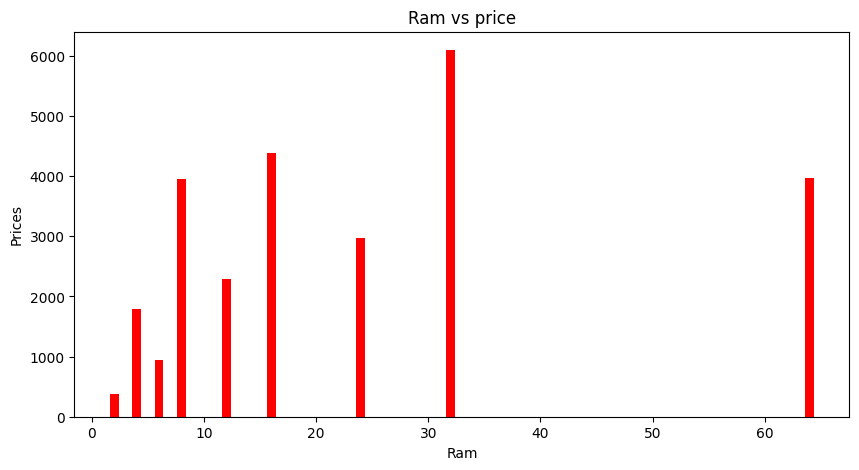

In [98]:
#Ram vs price
plt.figure(figsize=(10,5))
plt.bar(x = df['Ram'],height=df['Price_euros'],color='red')
plt.title("Ram vs price")
plt.xlabel("Ram")
plt.ylabel("Prices")
plt.show()

Text(0.5, 1.0, 'GPU_Models')

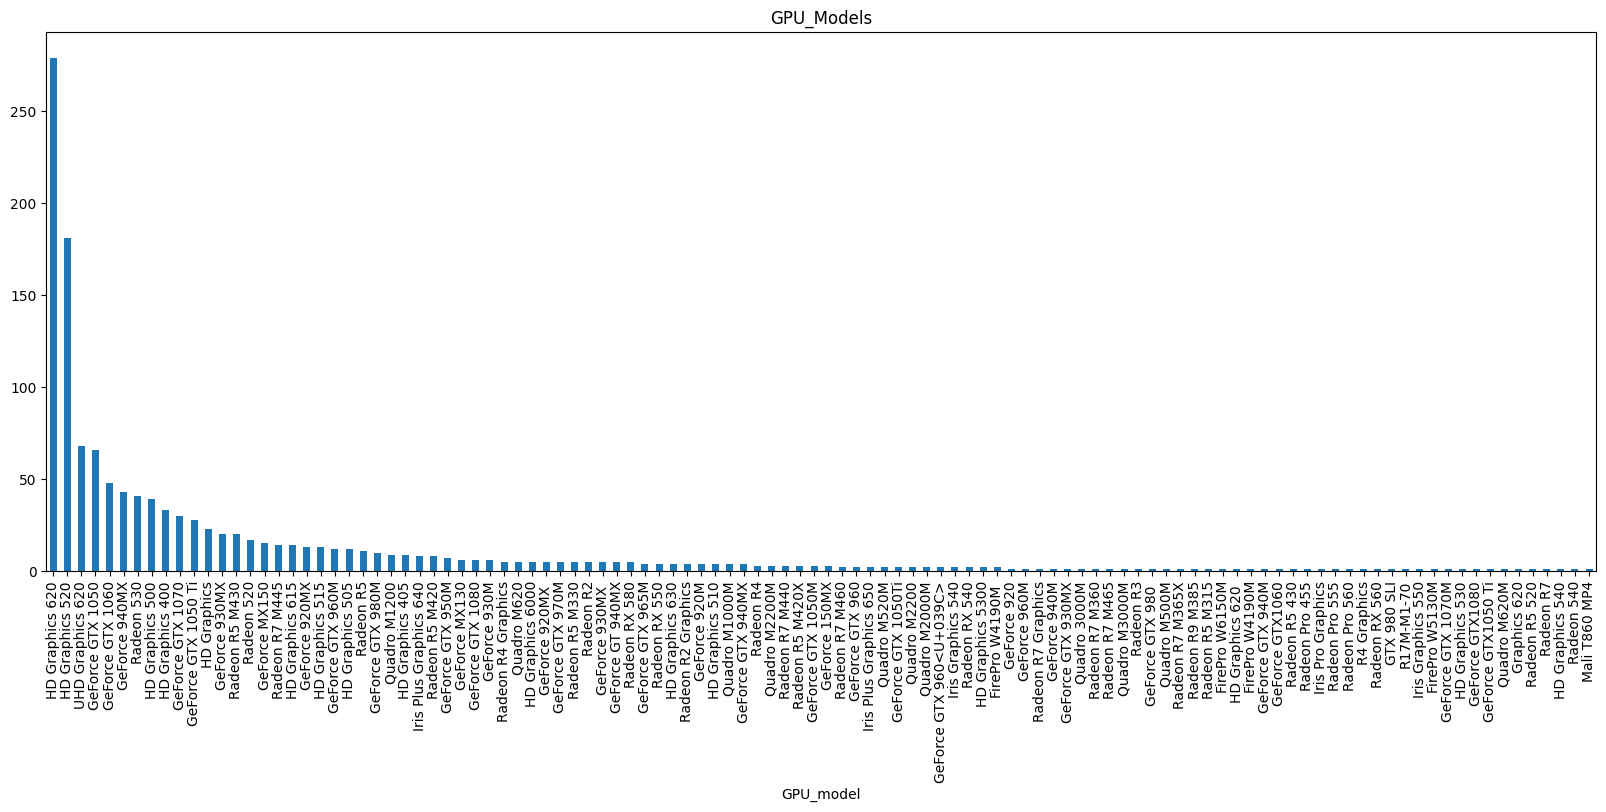

In [114]:
#GPU models
plt.figure(figsize=(20,7))
df['GPU_model'].value_counts().plot(kind='bar')
plt.title("GPU_Models")

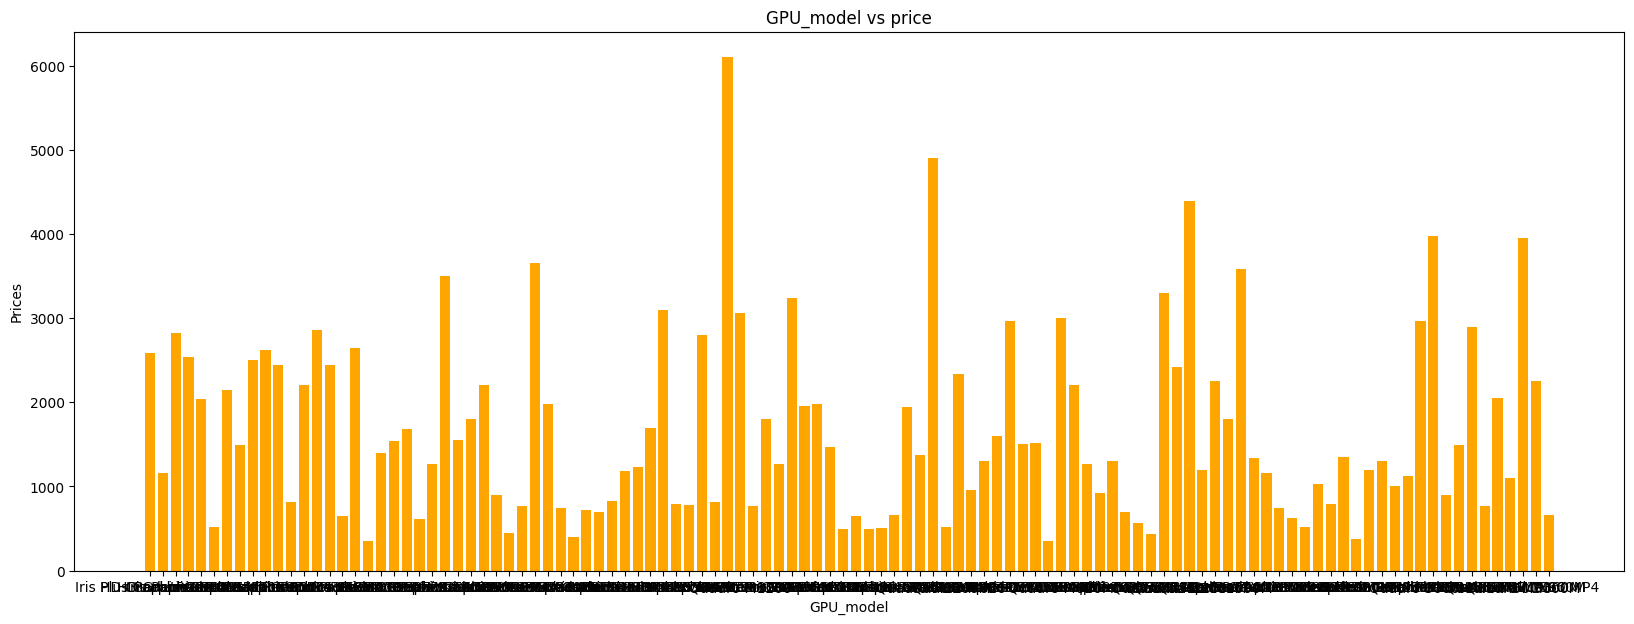

In [117]:
#Gpu_model vs Prices
plt.figure(figsize=(20,7))
plt.bar(x = df['GPU_model'],height=df['Price_euros'],color='orange')
plt.title("GPU_model vs price")
plt.xlabel("GPU_model")
plt.ylabel("Prices")
plt.show()

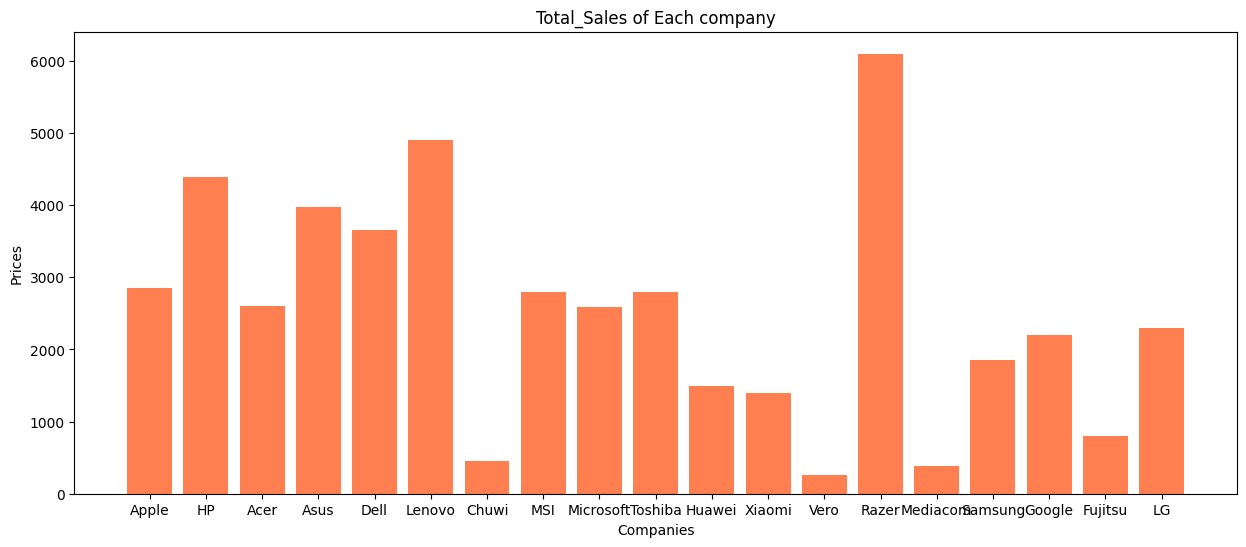

In [99]:
#Total_Sales
plt.figure(figsize=(15,6))
plt.bar(x = df['Company'], height = df['Price_euros'],color="Coral")
plt.title("Total_Sales of Each company")
plt.xlabel("Companies")
plt.ylabel("Prices")
plt.show()